In [81]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import Image
from io import StringIO
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
##np.random.seed(123)
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
data=pd.read_csv('../data/house_train.csv')

In [83]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [85]:
data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [86]:
char_cols=data.dtypes.pipe(lambda x: x[x=='object']).index

In [87]:
for c in char_cols:
    data[c].fillna(data[c].mode()[0], inplace=True)

In [88]:
char_cols=data.dtypes.pipe(lambda x: x[x=='float64']).index

In [89]:
for c in char_cols:
    data[c].fillna(data[c].mean(), inplace=True)

In [90]:
data.corr(method='pearson')
##to find correlation 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


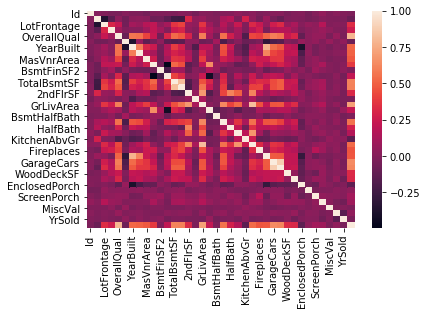

In [91]:
corr=data.corr()
sns.heatmap(corr)

In [92]:
char_cols=data.dtypes.pipe(lambda x: x[x=='object']).index

In [93]:
for c in char_cols:
    data[c] = pd.Categorical(data[c])
    dataDummies = pd.get_dummies(data[c],prefix = 'categorical')
    data = pd.concat([data,dataDummies], axis = 1)
    data.drop([c], axis = 1,inplace = True)

In [94]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,categorical_ConLw,categorical_New,categorical_Oth,categorical_WD,categorical_Abnorml,categorical_AdjLand,categorical_Alloca,categorical_Family,categorical_Normal,categorical_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 272 entries, Id to categorical_Partial
dtypes: float64(3), int64(35), uint8(234)
memory usage: 767.1 KB


In [96]:
corr = data.corr()

In [97]:
corr_matrix = data.corr().abs()

In [98]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [99]:
to_drop=[column for column in upper.columns if any(upper[column]>0.95)]

In [100]:
data.drop(data[to_drop],axis=1,inplace=True)

In [101]:
dat=data.drop('SalePrice',axis=1).apply(lambda x: x.corr(data.SalePrice))

In [102]:
dat

Id                    -0.021917
MSSubClass            -0.084284
LotFrontage            0.334901
LotArea                0.263843
OverallQual            0.790982
OverallCond           -0.077856
YearBuilt              0.522897
YearRemodAdd           0.507101
MasVnrArea             0.475241
BsmtFinSF1             0.386420
BsmtFinSF2            -0.011378
BsmtUnfSF              0.214479
TotalBsmtSF            0.613581
1stFlrSF               0.605852
2ndFlrSF               0.319334
LowQualFinSF          -0.025606
GrLivArea              0.708624
BsmtFullBath           0.227122
BsmtHalfBath          -0.016844
FullBath               0.560664
HalfBath               0.284108
BedroomAbvGr           0.168213
KitchenAbvGr          -0.135907
TotRmsAbvGrd           0.533723
Fireplaces             0.466929
GarageYrBlt            0.470177
GarageCars             0.640409
GarageArea             0.623431
WoodDeckSF             0.324413
OpenPorchSF            0.315856
                         ...   
categori

In [103]:
for index, row in dat.iteritems():
    if (row<0.2 and row>=0)or(row<=0 and row>-0.2):
        data.drop(index,axis=1,inplace=True)

In [104]:
data.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,categorical_BrkTil,categorical_PConc,categorical_No,categorical_SBrkr,categorical_Attchd,categorical_BuiltIn,categorical_Detchd,categorical_Fin,categorical_New,categorical_WD
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,0,1,1,1,1,0,0,0,0,1
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,0,0,0,1,1,0,0,0,0,1
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,0,1,0,1,1,0,0,0,0,1
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,1,0,1,1,0,0,1,0,0,1
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,0,1,0,1,1,0,0,0,0,1


In [105]:
y=data['SalePrice']

In [106]:
X=data.drop('SalePrice',axis=1)

In [107]:
X.shape, y.shape

((1460, 43), (1460,))

In [108]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#lib for linearregression

In [109]:
from sklearn.model_selection import train_test_split, cross_val_score

In [110]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.3,random_state=17)

In [111]:
X_train.shape,X_valid.shape

((1022, 43), (438, 43))

In [112]:
regr=linear_model.LinearRegression()
#regression

In [116]:
np.mean(cross_val_score(regr,X_train,y_train,cv=5))

0.7672098652925039

In [117]:
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [119]:
regr.score(X_train,y_train)

0.8231940806796789

In [124]:
pred=regr.predict(X_valid)

In [123]:
r2_score(y_valid,pred)

0.849420481407049